In [1]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_polymer, grow_polymer, \
     generate_N_polymers, expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
""" We can start a new Polymer object with a starting Monomer(angle) where angle is {0,1,2,3} for 0*90, 1*90, 2*90, 3*90 degrees

Here we start the chain with a monomer to the right
"""
first_monomer = Monomer(0)

polymer = Polymer((10,10), (5,5))
print(first_monomer.end_location)

In [ ]:
print(polymer.chain_end)
print(polymer.chain_start)

In [ ]:
polymer.add_monomer(3) # add monomer down
print(polymer.chain_end)

In [ ]:
"""
Since we dont want our Polymer to close we see that we get an arrow if we now
add further monomers that go to the left and up again
"""

polymer.add_monomer(2) # add monomer to the left
print(polymer.chain_end)
try:
    polymer.add_monomer(1) # add monomer up (should error out)
except:
    print('Could not add monomer')
print(polymer.chain_end)

In [ ]:
plot_polymer(polymer)

In [ ]:
for monomer in polymer:
    print(monomer, "angle = {}".format(monomer.angle))

In [ ]:
polymer1 = Polymer((10,10), (5,5))

In [ ]:
from random import randint

random_angles = [randint(0,3) for i in range(10)]

for i in random_angles:
    polymer1.add_monomer(i)

In [ ]:
plot_polymer(polymer1)

In [ ]:
m, polymer2 = grow_polymer((20,20), (10,10), 3)
m

In [ ]:
plot_polymer(polymer2)

In [ ]:
polymer2.chain_length

In [ ]:
"""
run test to check if behaviour is as expected for random polymers of length 1, 2, 3
"""
N = 1000
L = 2
end2end = np.zeros(N)
for i in range(N):
    test_m, testpoly = grow_polymer((10,10), (5,5), L)
    end2end[i] = np.sqrt(testpoly.distance_end_start())

plt.hist(end2end)
plt.savefig('Figures/end2endDistribution_L={}'.format(L))

"Distribution of end to end distances is as expected for these lengths"

In [ ]:
end_to_end, gyration, weights = generate_N_polymers(70, 10, (10,10), (5,5))
end_to_end_weighted_avg = expect_observ(end_to_end, weights)
end_to_end_err = error_observ(end_to_end, weights, 5)

In [3]:
polymer = Polymer((10,10), (5,5))
polymer.grow_polymer(10)

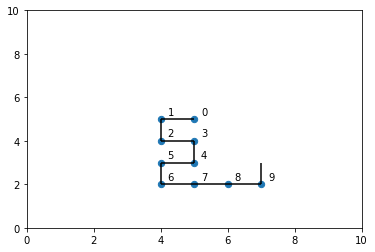

In [4]:
plot_polymer(polymer)

In [5]:
end, gyr = polymer.observables()

In [7]:
print(end)
print(gyr)

[ 1.  2.  1.  4.  5. 10.  9. 10. 13.]
[0.         0.25       0.44444444 0.5        0.8        0.91666667
 1.30612245 1.5        1.77777778]


In [2]:
dish = Dish((10,10), (5,5))


In [4]:
dish.generate_N_polymers(10, 10)

(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan]]),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        

In [3]:
dish.polymers

In [3]:
weights = dish.weights
observ = dish.end_to_end


NameError: name 'dish' is not defined

In [9]:

end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
def scaling_law(L, dims):
    ls = np.arange(L)+1
    exponent = 2*3/4

    return ls**exponent

In [7]:
exp_behaviour = scaling_law(10, 2)

NameError: name 'scaling_law' is not defined

In [ ]:
plt.plot(np.arange(10),exp_behaviour, label=r'exp.')
plt.errorbar(np.arange(9), end_to_end_weighted_avg, yerr=end_to_end_err, label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")